In [1]:
import tensorflow
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train,X_test = X_train/255.0 , X_test/255.0

In [5]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
y_train.shape

(60000,)

In [7]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512,activation='relu',activity_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(512,activation='relu',activity_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(10,activation='softmax')

])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
__________________________________________________

In [9]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
early_stopping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [11]:
history = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),callbacks=[early_stopping])

Epoch 1/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6033 - accuracy: 0.8060 - val_loss: 0.4484 - val_accuracy: 0.8566
Epoch 2/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4874 - accuracy: 0.8382 - val_loss: 0.4322 - val_accuracy: 0.8535
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4545 - accuracy: 0.8490 - val_loss: 0.4368 - val_accuracy: 0.8572
Epoch 4/50
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4402 - accuracy: 0.8539 - val_loss: 0.4324 - val_accuracy: 0.8537
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4273 - accuracy: 0.8581 - val_loss: 0.4073 - val_accuracy: 0.8632
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4223 - accuracy: 0.8615 - val_loss: 0.4024 - val_accuracy: 0.8656
Epoch 7/50
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4126 - accuracy: 0.8655 - val_loss: 0.3972 - val_accur

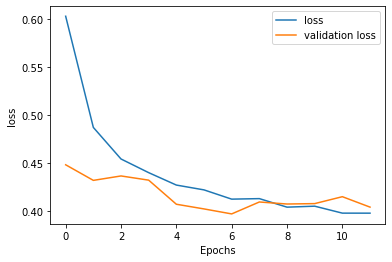

In [12]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


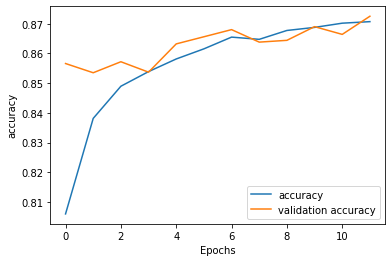

In [13]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


## prediction

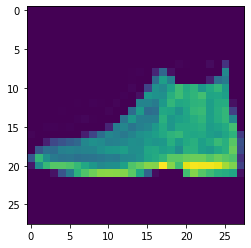

In [17]:
plt.imshow(X_test[0])

In [18]:
# Define class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


single_predict =X_test[0].reshape(1,28,28)
single_prediction = model.predict(single_predict)
predicted_class = np.argmax(single_prediction)

print(class_names[predicted_class])
print(predicted_class)

Ankle boot
9
